# Triangulation  + MMG vs Ground truth
On se propose ici de comparer la position du centre de gravité calculé par notre MMG suivi d'une triangulation aux valeurs de la vérité du terrain GT

In [7]:
import _init_paths
import tensorflow as tf
from utils.epipolar_geo import *
import pickle
import os
import numpy as np


In [2]:
# Import des poses de l'estimateure 2D
file=os.path.abspath('voxel_2d_human_centers.pkl')
a_file = open(file, "rb")
vxl_2d = pickle.load(a_file)
a_file.close()

In [9]:
file=os.path.abspath('GT_3d_human_centers.pkl')
a_file = open(file, "rb")
gt = pickle.load(a_file)
a_file.close()

In [5]:
# Triangulation pour l'acteur 1 :  On limite les frames à celles qu'on a traitées 704~1100
'''
P1t et P2t sont les matrices de projecions des caméras
'''
P1t=tf.constant([[439.0,180.81,-26.946,185.95],[-5.3416,88.523,-450.95,1324],[0.0060594,0.99348,-0.11385,5.227]])
P2t=tf.constant([[162.36,-438.34,-17.508,3347.4],[73.3,-10.043,-443.34,1373.5],[0.99035,-0.047887,-0.13009,6.6849]])
pts_act1=[]
for value in vxl_2d :
    dic=[]
    for key in vxl_2d[value] :
        dic.append(vxl_2d[value][key][0])
    x1=tf.constant([dic[0][0],dic[0][1],1])
    x1=tf.reshape(x1,shape=(3,1))
    x1 = tf.transpose(x1[:2],(1,0)).numpy()
    x2=tf.constant([dic[1][0],dic[1][1],1])
    x2=tf.reshape(x2,shape=(3,1))
    x2 = tf.transpose(x2[:2],(1,0)).numpy()

    point = epipolar_geometry().tf_triangulate_points(P1t,P2t,x1,x2)*1000
    pts_act1.append(point)
        
    if value == 'image_1100':
        break

In [3]:
# Triangulation pour l'acteur 2

P1t=tf.constant([[439.0,180.81,-26.946,185.95],[-5.3416,88.523,-450.95,1324],[0.0060594,0.99348,-0.11385,5.227]])
P2t=tf.constant([[162.36,-438.34,-17.508,3347.4],[73.3,-10.043,-443.34,1373.5],[0.99035,-0.047887,-0.13009,6.6849]])
pts_act2=[]
for value in vxl_2d :
    dic=[]
    for key in vxl_2d[value] :
        dic.append(vxl_2d[value][key][1])
    x1=tf.constant([dic[0][0],dic[0][1],1])
    x1=tf.reshape(x1,shape=(3,1))
    x1 = tf.transpose(x1[:2],(1,0)).numpy()
    x2=tf.constant([dic[1][0],dic[1][1],1])
    x2=tf.reshape(x2,shape=(3,1))
    x2 = tf.transpose(x2[:2],(1,0)).numpy()

    point = epipolar_geometry().tf_triangulate_points(P1t,P2t,x1,x2)*1000
    pts_act2.append(point)
        
    if value == 'image_1100':
        break

In [6]:
# Triangulation pour l'acteur 3

P1t=tf.constant([[439.0,180.81,-26.946,185.95],[-5.3416,88.523,-450.95,1324],[0.0060594,0.99348,-0.11385,5.227]])
P2t=tf.constant([[162.36,-438.34,-17.508,3347.4],[73.3,-10.043,-443.34,1373.5],[0.99035,-0.047887,-0.13009,6.6849]])
pts_act3=[]
for value in vxl_2d :
    dic=[]
    for key in vxl_2d[value] :
        dic.append(vxl_2d[value][key][2])
    x1=tf.constant([dic[0][0],dic[0][1],1])
    x1=tf.reshape(x1,shape=(3,1))
    x1 = tf.transpose(x1[:2],(1,0)).numpy()
    x2=tf.constant([dic[1][0],dic[1][1],1])
    x2=tf.reshape(x2,shape=(3,1))
    x2 = tf.transpose(x2[:2],(1,0)).numpy()

    point = epipolar_geometry().tf_triangulate_points(P1t,P2t,x1,x2)*1000
    pts_act3.append(point)
        
    if value == 'image_1100':
        break

### Calcul des erreurs relatives

In [10]:
# Acteur 1
i=0
erreur_actor3=[]
for frame in gt :
    if frame == 'image_704':
        continue
    if frame == 'image_1100':
        break
    i+=1
    erreur_actor3.append(np.linalg.norm(gt[frame][2]-pts_act3[i][0].numpy())/np.linalg.norm(gt[frame][2]))
np.mean(erreur_actor3)*100

0.18873447424554568

In [11]:
# Acteur 2
i=0
erreur_actor2=[]
for frame in gt :
    if frame == 'image_704':
        continue
    if frame == 'image_1100':
        break
    i+=1
    erreur_actor2.append(np.linalg.norm(gt[frame][1]-pts_act2[i][0].numpy())/np.linalg.norm(gt[frame][1]))
np.mean(erreur_actor2)*100

0.08307851707805854

In [12]:
# Acteur 3
i=0
erreur_actor1=[]
for frame in gt :
    if frame == 'image_704':
        continue
    if frame == 'image_1100':
        break
    i+=1
    erreur_actor1.append(np.linalg.norm(gt[frame][0]-pts_act1[i][0].numpy())/np.linalg.norm(gt[frame][0]))
np.mean(erreur_actor1)*100

0.15342847138412014

## Erreur relative moyenne
# sur tous les acteurs

In [23]:
np.mean([np.mean(erreur_actor1),np.mean(erreur_actor2),np.mean(erreur_actor3)])*100

0.1417471542359081

## Plot en 3D

In [14]:
%matplotlib inline
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

In [28]:
gt['image_704'][0:2][0]

array([5302.91645 , 4307.1887  ,  989.866735])

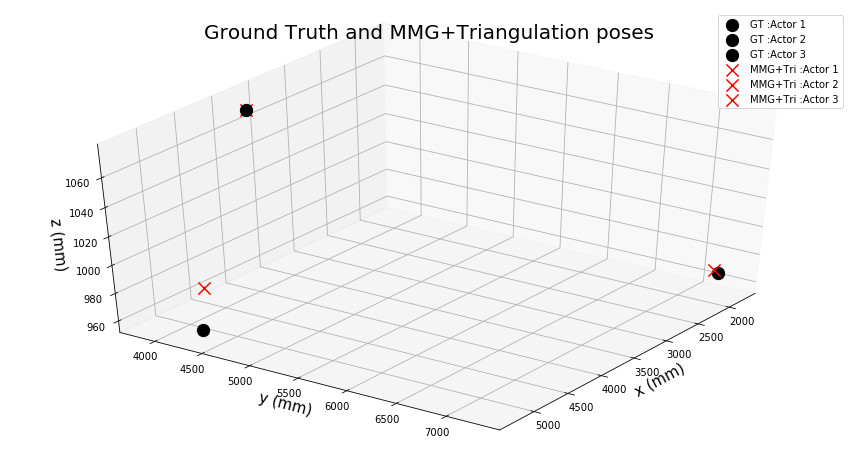

In [81]:
def plot_image(frame=704) :
    fig = plt.figure(figsize=(15,8))
    ax = plt.axes(projection='3d')
    ax.scatter3D(gt['image_'+str(frame)][0][0], gt['image_'+str(frame)][0][1], gt['image_'+str(frame)][0][2],color='black',marker='o',s=150);
    ax.scatter3D(gt['image_'+str(frame)][1][0], gt['image_'+str(frame)][1][1], gt['image_'+str(frame)][1][2],color='black',marker='o',s=150);
    ax.scatter3D(gt['image_'+str(frame)][2][0], gt['image_'+str(frame)][2][1], gt['image_'+str(frame)][2][2],color='black',marker='o',s=150);
    ax.scatter3D(pts_act1[frame-704].numpy()[0][0],pts_act1[frame-704].numpy()[0][1],pts_act1[frame-704].numpy()[0][2],color='red',marker='x',s=150);
    ax.scatter3D(pts_act2[frame-704].numpy()[0][0],pts_act2[frame-704].numpy()[0][1],pts_act2[frame-704].numpy()[0][2],color='red',marker='x',s=150);
    ax.scatter3D(pts_act3[frame-704].numpy()[0][0],pts_act3[frame-704].numpy()[0][1],pts_act3[frame-704].numpy()[0][2],color='red',marker='x',s=150);
    ax.legend(['GT :Actor 1','GT :Actor 2','GT :Actor 3','MMG+Tri :Actor 1','MMG+Tri :Actor 2','MMG+Tri :Actor 3'])
    ax.set_xlabel('x (mm)',fontsize=15)
    ax.set_ylabel('y (mm)',fontsize=15)
    ax.set_zlabel('z (mm)',fontsize=15)
    ax.set_title('Ground Truth and MMG+Triangulation poses',fontsize=20)
    ax.view_init(40, 35)
    fig

plot_image(708)